# Introductory applied machine learning (INFR10069)

# Assignment 4: Feature Engineering

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.


## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 09_Assignment_4.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=09_Assignment_4.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 09_Assignment_4.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

In this assignment you are asked to import all the packages and modules you will need. Include all required imports and execute the cell below.

In [178]:
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
# Your code goes here

## Description of the datasets


This assignment is based on two datasets:
1. the 20 Newsgroups Dataset (you should recognise it from Assignment 1)
2. the MNIST digits dataset

### 20 Newsgroups

For convenience, we repeat the description here. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related.

**In contrast to Assignment 1**, we have opted to use tf-idf weights ([term frequency - inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf))
for each word instead of the frequency counts. These weights represent the importance of a word to a
document with respect to a collection of documents. The importance increases proportionally to the number
of times a word appears in the document and decreases proportionally to the number of times the word
appears in the whole corpus. 

Additionally we preprocess the data to include the most frequent 1000 words that are in greater than 2 documents, less than half of all documents, and that are not [stop words](https://en.wikipedia.org/wiki/Stop_words).

We will perform all this preprocessing for you.


### MNIST
This MNIST Dataset is a collection handwritten digits. The samples are partitioned (nearly) evenly across the 10 different digit classes {0, 1, . . . , 9}. We use a preprocessed version for which the data are $8 \times 8$ pixel images containing one digit each. For further details on how the digits are preprocessed, see the sklearn documentation. The images are grayscale, with each pixel taking values in {0, 1, . . . , 16}, where 0 corresponds to black (weakest intensity) and 16 corresponds to white (strongest intensity). Therefore, the dataset is a N × 64
dimensional matrix where each dimension corresponds to a pixel from the image and N is the number of
images. 

Again, to save you time, we perfom the import for you.

## 1. Clustering the 20 Newsgroups Data [50%]

In part 1 we will cluster the observations in the 20 Newsgroups dataset using the k-means algorithm. Each row of the dataset represents a document with bag of words features. If we were not given the labels for each document (i.e. the newsgroup it came from), clustering could allow us to infer which documents should have the same label. Observing common words within each cluster may allow us to give meaning to these inferred labels too.

First we'll import the data and fit and evaluate k-means with 5 cluster centres. Next, we will try and infer which cluster corresponds with which label. Finally, we will pretend we don't know the number of clusters there should be, as is the normal scenario with large unlabeled data, and investigate the effect of using a different number of cluster centres (i.e. varying `k`).

### ========== Question 1.0 --- [0 marks] ==========

Run the below cells to import the data. It would be a good idea to understand the code but it's not strictly necessary (see the [sklearn documentation](http://scikit-learn.org/0.17/datasets/index.html#the-20-newsgroups-text-dataset)).

*This may take a wee while as it will download the dataset*

**Do not change any of the code in this question**

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
        'rec.sport.baseball', 'rec.sport.hockey']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats, 
                                      remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english', 
                             token_pattern='(?u)\\b[A-z]{2,}\\b')
X_sparse = vectorizer.fit_transform(newsgroups_train.data)
y_num = newsgroups_train.target
X = pd.DataFrame(X_sparse.todense(), columns=vectorizer.get_feature_names())
y = np.array(cats)[y_num]

### ========== Question 1.1 --- [5 marks] ==========

Perform an initial inspection of the data, X and y (no more than 5 lines of code). Below the code, describe what the data are i.e. what the objects are, and what they represent (fewer than 4 sentences).

In [4]:
print (X.describe())
print (X.head(20))
print (y)
print (len(y))

               abc      ability         able           ac       accept  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.002436     0.002149     0.006709     0.001454     0.002286   
std       0.030224     0.020739     0.034631     0.023100     0.021634   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.723914     0.420916     0.431380     0.519765     0.443354   

            access    according     acquired     actually      adaptec  \
count  2845.000000  2845.000000  2845.000000  2845.000000  2845.000000   
mean      0.003953     0.003115     0.000921     0.008366     0.001816   
std       0.030111     0.026958     0.016275     0.043921     0.026026   
min       0.000000     0.000000     0

The data here that we have represents the tf-idf weights for 1000 most frequent words that appear in 2845 newsgroup documents for the 5 newsgroups that we have specified. The attributes are quite sparse, i.e. only very few words appear in a given document. 

The y array contains all the actual labels for all the 2845 documents that we have specified above

### ========== Question 1.2 --- [2 marks] ==========

Initialise a [k-means clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) object with 5 clusters. Make sure that you can reproduce your results exactly. *Hint: there is an argument for this*. You need only set two arguments; others can be kept as default. Call the instantiated object `kmeans`. Use the `fit()` method to fit to the training data (X imported above)

In [28]:
km = KMeans(n_clusters = 5, random_state = 1337) #As mentioned in the lab
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1337, tol=0.0001, verbose=0)

### ========== Question 1.3 --- [6 marks] ==========

Evauate the quality of this fit.

1. Get a feel for the average distance of a data point from the centre: print the mean of the euclidean distances of all data points from the mean data point (in the whole dataset)
1. print the inertia of the model. *Hint: check the properties of the kmeans object*
1. print the adjusted rand index of the model. *Hint: `adjusted_rand_score`*

Below the code: 
1. Define what the inertia and adjusted rand score are (one or two sentences). *Hint: check [sklearn documentation](http://scikit-learn.org/stable/modules/clustering.html)*
1. Comment on the quality of the clustering implied by the adjusted rand score and inertia

In [30]:
#np.linarg.norm with axis = 1 computes np.sqrt(np.sum(x^2)) along each row, which is basically the euclidean distance
print ("The mean of eulidean distances is {}" .format(np.round(np.mean(np.linalg.norm(X-X.mean(), axis=1)), decimals = 4)))
print ("The inertia of the model is {}" .format(np.round(km.inertia_, decimals = 4)))
print ("The adjusted rand index of the model is {}" .format(np.round(adjusted_rand_score(y, km.labels_), decimals = 4)))

The mean of eulidean distances is 0.9546
The inertia of the model is 2593.3719
The adjusted rand index of the model is 0.2506


Inertia is defined as the sum of squares of the distance between the points and the cluster center for each given cluster.

The adjusted rand index is a measure of the similarity between the two assignments, which in this case are the actual labels and the labels predicted using clustering. 1 is the perfect match score and random label assignments have a score close to 0.

We can see that the quality of clustering is very poor in this case as the adjusted rand index is very close to 0. Even if we had predicted all the labels randomly we could have got an index similar to what we have got here.
The inertia is also very high which means that some points are quite far away from their cluster centres.


### ========== Question 1.4 --- [3 marks] ==========

Print:
1. the number of datapoints with each label
2. the number of datapoints assigned to each cluster. *Hint: you should use the properties of the kmeans object you just fit.* 

Below the code, comment on the distribution of datapoints to cluster centres.

In [32]:
l = y.tolist()
for c in cats:
    print ("{}  {}" .format(c, l.count(c)))
    
print("\n")

l2 = km.labels_.tolist()
for i in range(5):
    print( "Cluster {} : {}" .format(i, l2.count(i)) )

alt.atheism  480
comp.sys.ibm.pc.hardware  590
comp.sys.mac.hardware  578
rec.sport.baseball  597
rec.sport.hockey  600


Cluster 0 : 969
Cluster 1 : 689
Cluster 2 : 222
Cluster 3 : 381
Cluster 4 : 584


We can see here that the the number of datapoints in each of the clusters is quite different from the number of datapoints for each specific label. Cluster 0 has too many points and Cluster 2 has too less points.

We want the clusters to be representative of the different labels having similar figures for the number of datapoints as the labels have. Hence our clustering is quite poor as also seen in question 1.3.


### ========== Question 1.5 --- [3 marks] ==========

We can't visualise these cluster centres directly, since they are 1000 dimensional. However, we can at least measure the distance between each centre. Create a distance matrix such that the entry with index (i,j) shows the distance between centre i and j. *Hint: again you should use the properties of the kmeans object you just fit.*

In [8]:
dist_mat = np.zeros([5, 5])
for i in range(5):
    for j in range(5):
        dist_mat[i][j] = np.linalg.norm(km.cluster_centers_[i] - km.cluster_centers_[j])
print (dist_mat)

[[ 0.          0.18862704  0.34253171  0.21613938  0.20554353]
 [ 0.18862704  0.          0.32152977  0.27272268  0.29016893]
 [ 0.34253171  0.32152977  0.          0.39789789  0.40913504]
 [ 0.21613938  0.27272268  0.39789789  0.          0.28301014]
 [ 0.20554353  0.29016893  0.40913504  0.28301014  0.        ]]


### ========== Question 1.6 --- [3 marks] ==========

For each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Below the code, comment on the quality of the fit. *Hint: you can do the main plot (without labels) in one line with seaborn (you're free to do it as you like though!).*

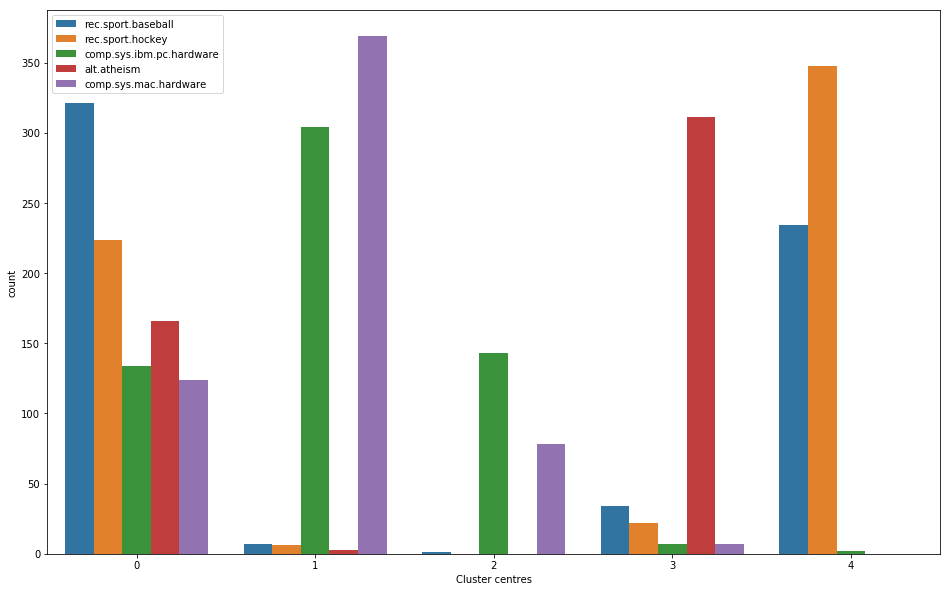

In [33]:
ax = sns.countplot(x=km.labels_, hue=y)
ax.figure.set_size_inches(16, 10)
plt.xlabel("Cluster centres")
plt.show()

Cluster 0 which contains all the labels is the most corrupted cluster. Clusters 1 and 2 predominantly contain comp.sys.ibm.pc.hardware and comp.sys.mac.hardware which makes sense because these 2 labels are quite similar. 

Cluster 4 predominantly contains rec.sport.baseball and rec.sport.hockey which is again explained by the similarity of these 2 classes as mentioned before. Cluster 3 contains alt.atheism as a majoirty.

The corruption of all these clusters and concentration of datapoints in cluster 0 explains why the datapoints are quite similar and why only uisng K means gives us a poor fit.

### ========== Question 1.7 --- [8 marks] ==========

We will now investigate using dimensionality reduction to try and improve the quality of the fit. Use the sklearn implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to create a reduced reduced dataset for `n_components` = [1,2,3,5,10,20,50,100,500,1000] i.e. create datasets that are of shape `(N, d)` for `d` in `n_components`. Fit k-means to each reduced dataset and report the `inertia` and `adjusted_rand_score` for each iteration.

Plot `adjusted_rand_score` against number of principal components (label graph). Use a log scale on the x axis. Below the graph:
1. describe what it shows
1. explain why we cannot use inertia to choose the best number of principal components
1. explain why dimensionality reduction could help k-means perform better

The inertia for iteration 1 is 2.8213
The adjusted rand index for iteration 1 is 0.2105


The inertia for iteration 2 is 10.5786
The adjusted rand index for iteration 2 is 0.2678


The inertia for iteration 3 is 20.4436
The adjusted rand index for iteration 3 is 0.2397


The inertia for iteration 4 is 49.7363
The adjusted rand index for iteration 4 is 0.2196


The inertia for iteration 5 is 117.6947
The adjusted rand index for iteration 5 is 0.2165


The inertia for iteration 6 is 231.2618
The adjusted rand index for iteration 6 is 0.2179


The inertia for iteration 7 is 488.2569
The adjusted rand index for iteration 7 is 0.2022


The inertia for iteration 8 is 800.2886
The adjusted rand index for iteration 8 is 0.1804


The inertia for iteration 9 is 2131.8803
The adjusted rand index for iteration 9 is 0.2155


The inertia for iteration 10 is 2593.2561
The adjusted rand index for iteration 10 is 0.2182




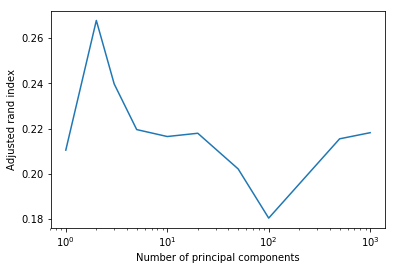

In [10]:

n_components = [1,2,3,5,10,20,50,100,500,1000] #We have 10 different types
adj_score = np.zeros([10])
i = 0

for n in n_components:
    pca = PCA(n_components = n)
    red_data = pca.fit_transform(X)
    km.fit(red_data)
    print("The inertia for iteration {} is {}" .format(i+1, np.round(km.inertia_, decimals = 4)))
    print("The adjusted rand index for iteration {} is {}" .format(i+1, np.round(adjusted_rand_score(y, km.labels_), decimals = 4)))
    print("\n")
    adj_score[i] = adjusted_rand_score(y, km.labels_)
    i += 1
    
plt.plot(n_components, adj_score)
plt.xlabel("Number of principal components")
plt.ylabel("Adjusted rand index")
plt.xscale("log")


The graph shows the number of prinicipal components used in dimensionlity reduction on the x axis and the adjusted rand index for each specific number on the y axis. The adjusted rand index peaks when the dimensionality is 2.

We cannot use inertia to choose the best number of components because inertia is only the sum of the squares of the distances and is not normalised accross dimensions where the distances between points might be very large (as we observe above, the inertia increases with the increase in components) due to the increased number of dimensions. 

Dimensionality reduction helps k means perform better because in higher dimensions points are quite far apart possibly due to the increase in complexity and the euclidean distance parameter does not work well. We are trying to find the dimensions with the highest variance and remove those that have a low variance as they can unnecessarily affect the cluster centers.

### ========== Question 1.8 --- [6 marks] ==========

1. So we can visualise the data, create X_2d: the dataset X transformed down to 2 principal component dimensions. Use sklearn's implementation of [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and its method `fit_transform()` to do this (as above). 

1. Create a new k-means object, `kmeans_pca`, and fit the 2d data to it. Show the adjusted rand score.

1. As above, for each cluster centre label, plot the counts of the true labels. The cluster labels are a property of the k-means object, the true labels are contained in `y`. Make sure that you label the plot axes and legend clearly. Print below it the number of data points each cluster is responsible for.

1. Finally, below the plot, comment on the difference between these clusters and the clusters on the 1000 dimensional data with respect to the distribution of the labels in each. Are they better?

The adjusted rand index of the model is 0.2687


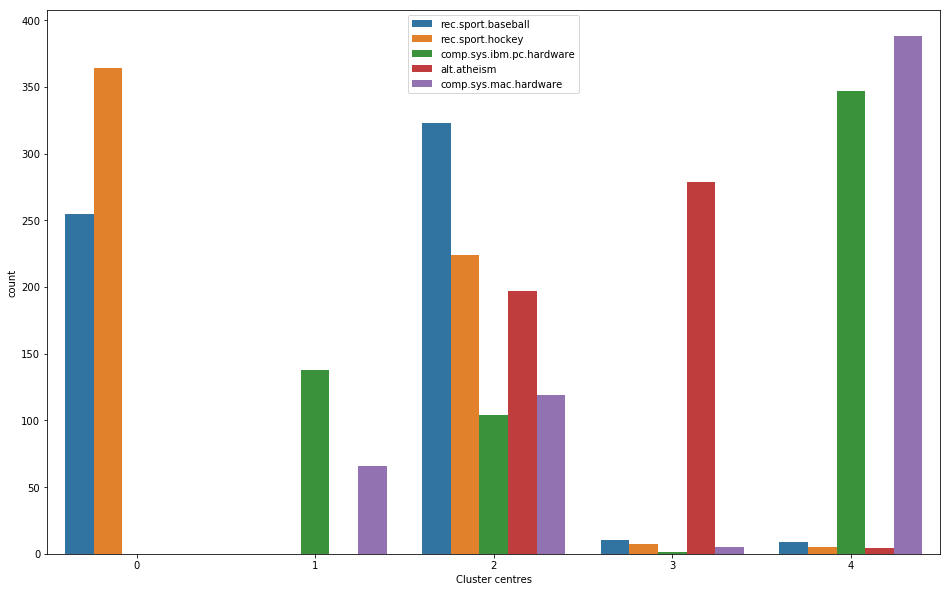



Cluster 0 : 619
Cluster 1 : 204
Cluster 2 : 967
Cluster 3 : 302
Cluster 4 : 753


In [11]:
pca = PCA(n_components = 2)
X_2d = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters = 5, random_state = 1337)
kmeans_pca.fit(X_2d)
labels = kmeans_pca.labels_

print ("The adjusted rand index of the model is {}" .format(np.round(adjusted_rand_score(y, labels), decimals = 4)))

    
ax = sns.countplot(x=labels, hue=y)
ax.figure.set_size_inches(16, 10)
plt.xlabel("Cluster centres")
plt.show()

print("\n")
l2 = labels.tolist()
for i in range(5):
    print( "Cluster {} : {}" .format(i, l2.count(i)) )

These clusters have done only slightly better than the clusters we got using the 1000 dimensional data. The adjusted rand score has gone up slightly and the clusters seem less corrupted (especially clusters 1 and 3)

### ========== Question 1.9 --- [1 mark] ==========

Given the above plot, apply a label to each cluster centre. Create a new vector, `labels_interp`, which is the same as `kmeans.labels_`, but instead of numbers, the interpreted label of the cluster centre. For example, if you decided cluster 0 was 'apples', 1 was 'pears', 2 was 'stairs', and `kmeans.labels_` was `[2, 0, 1, 1, 0]`, create  `labels_interp = ['stairs', 'apples', 'pears', 'pears', 'apples']`. Hint: an example of how to do this is given in the last line of Question 1.0.

**N.B. be careful to use the `kmeans_pca` object you created above, not the first kmeans object you made**

In [21]:
categories = ['rec.sport.hockey','comp.sys.ibm.pc.hardware','rec.sport.baseball','alt.atheism','comp.sys.mac.hardware']
labels_interp = np.array(categories)[labels]

### ========== Question 1.10 --- [3 marks] ==========

Produce a normalised (by true label) confusion matrix of your interpreted labels from the k-means clustering and the true labels. As usual, you may use any functions from previous assignments or labs. Clearly label the axes of the plot. Check that these confusions correlate with your expectations! N.B. this is just a slightly different way of interpreting the information in the count plot above (focussed this time on the true labels).

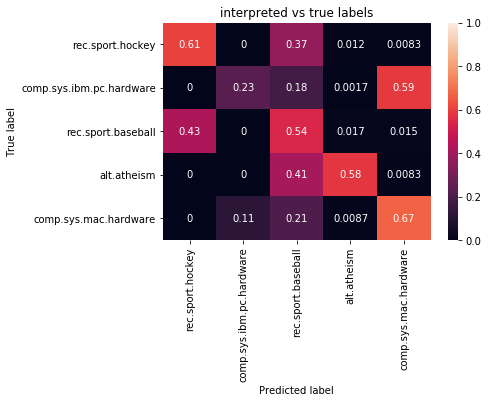

In [22]:
#From lab 2

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y, labels_interp, labels=categories)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=categories, title='interpreted vs true labels')

### ========== Question 1.11 --- [6 marks] ==========

Since we are now in 2 dimensions, let's visualise the data, the cluster centres, and the decision boundaries via a [Voronoi_diagram](https://en.wikipedia.org/wiki/Voronoi_diagram). You'll essentially be able to copy and paste the code from the [sklearn kmeans digits example](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) and edit a few bits to get over half marks.

Clearly mark each cluster centre.

For full marks, additionally:
* label each cluster centre with the inferred cluster label
* create a second plot which clearly shows where the true classes lie within the pca space e.g. the [sklearn PCA example here](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html)

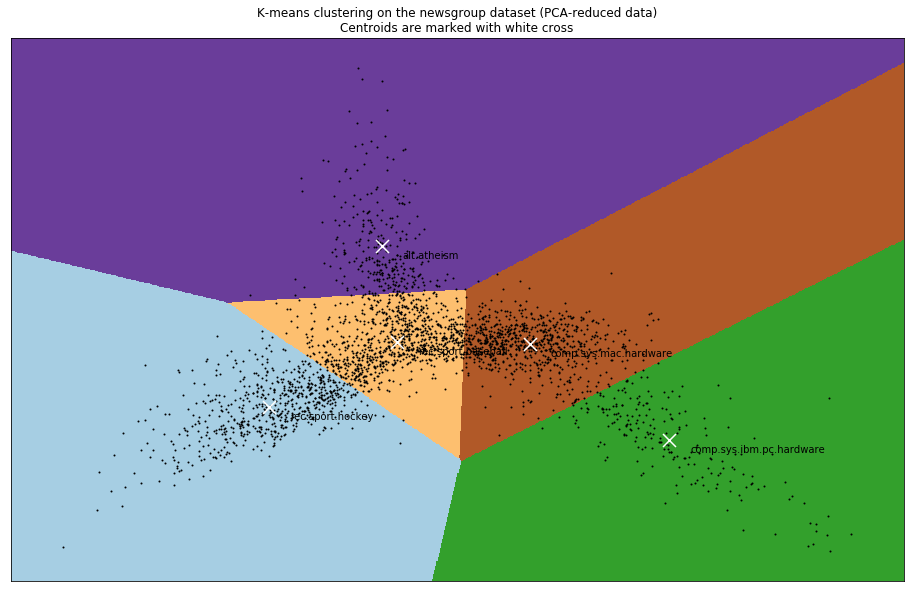

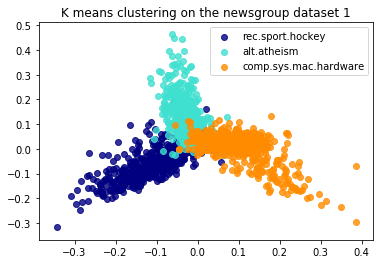

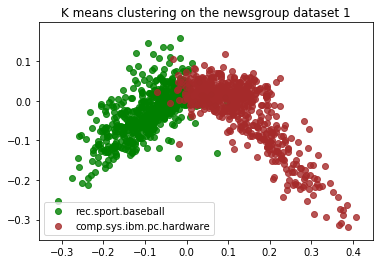

In [23]:
#Step size of the mesh. Decrease to increase the quality of the VQ.
h = .001    # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_2d[:, 0].min() - .05, X_2d[:, 0].max() + .05
y_min, y_max = X_2d[:, 1].min() - .05, X_2d[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,10))
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_2d[:, 0], X_2d[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans_pca.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

#Placing the labels .02 below and on the right of the coordinate 
for centroid, label in zip(centroids, categories):
    plt.annotate(label, xy=centroid, xytext=(centroid[0]+.02,centroid[1]-.02))


plt.title('K-means clustering on the newsgroup dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#Using 2 loops like the example t create 2 loops for clarity

colors1 = ['navy', 'turquoise', 'darkorange']
target_names1 = ['rec.sport.hockey','alt.atheism', 'comp.sys.mac.hardware']

for color, target_name in zip(colors1, target_names1):
    plt.scatter(X_2d[y == target_name, 0], X_2d[y == target_name, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('K means clustering on the newsgroup dataset 1')
plt.figure(figsize=(10,6))
plt.show()

colors2 = ['green', 'brown']
target_names2 = ['rec.sport.baseball', 'comp.sys.ibm.pc.hardware']


for color, target_name in zip(colors2, target_names2):
    plt.scatter(X_2d[y == target_name, 0], X_2d[y == target_name, 1], color=color, alpha=.8, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('K means clustering on the newsgroup dataset 1')
plt.figure(figsize=(10,6))
plt.show()


### ========== Question 1.12 --- [4 marks] ==========

*Write a **1 or 2 sentence** answer for each question*.

1. Is the kmeans algorithm deterministic?
1. Did the algorithm you ran above in Question 1.2 (fitting k-means) do multiple initialisations? If not, explain why it was not necessary. If so, how was the final model selected?
1. The default method for initialising centres in the sklearn implementation is [kmeans++](https://en.wikipedia.org/wiki/K-means%2B%2B). Name another method for initialising and a problem with it.

The kmeans algorithm is not deterministic. It converges to a local minimum unless we fix the cluster centers at the time of initialising the Kmeans object by passing it as an ndarray.

Yes the algorithm did do multiple initialisations. It picked the k initial cluster centres using kmeans++ (default value of init) and then went on to optimise them using the standard k means algorithm. 

Another method for initialising centres is random. The problem with random is that the centres can be anywhere and are not spead out and this will lead to very poor clustering.

## 2. PCA with MNIST Data [50%]

In the second part of the assignment we will explore the MNIST digits dataset. We expect the digits to lie in a lower-dimensional manifold and want to examine the representation we get by applying Principal Components Analysis (PCA). PCA maps the data into a new space by effectively rotating the base vectors of the input space to the directions with the highest variance. We will assess the impact of this mapping to the classification task and the separability of the data in the PCA space.

### ========== Question 2.0 --- [0 marks] ==========

Run the cell below to load the digits object and print its description.

**Do not change any of the code in this question**

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

### ========== Question 2.1 --- [8 marks] ==========

If you execute `digits.keys()`, you'll see this object contains the data, the targets (the labels), and the images (the data reshaped to 8x8 images). More typically the mnist data are [28x28 images](http://yann.lecun.com/exdb/mnist/), but this is a preprocessed version. 

1. Use the pandas describe method on the data to get a feel for the range of each dimension
1. What are the max/min values for each dimension?
1. Extract the standard deviations from the output of the describe method (just another DataFrame with 'std' as one of the index values), reshape to an 8x8 image, and plot a heatmap (use `sns.heatmap()`) to show you which dimensions vary the most. For a bonus mark, produce a plot like this for each digit. *Hint: you can use `.groupby(digits.target)` before calling `.describe()`*.
1. Use `sns.heatmap()` to plot the first 9 digits in the dataset

Below the plots, answer this question in a markdown cell:
1. Are all of the dimensions going to be equally helpful for modelling? Explain.

The maximums for each dimension are
[  0.   8.  16.  16.  16.  16.  16.  15.   2.  16.  16.  16.  16.  16.  16.
  12.   2.  16.  16.  16.  16.  16.  16.   8.   1.  15.  16.  16.  16.  16.
  15.   1.   0.  14.  16.  16.  16.  16.  14.   0.   4.  16.  16.  16.  16.
  16.  16.   6.   8.  16.  16.  16.  16.  16.  16.  13.   1.   9.  16.  16.
  16.  16.  16.  16.]


The minimums for each dimension are
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


/afs/inf.ed.ac.uk/user/s15/s1558717/miniconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


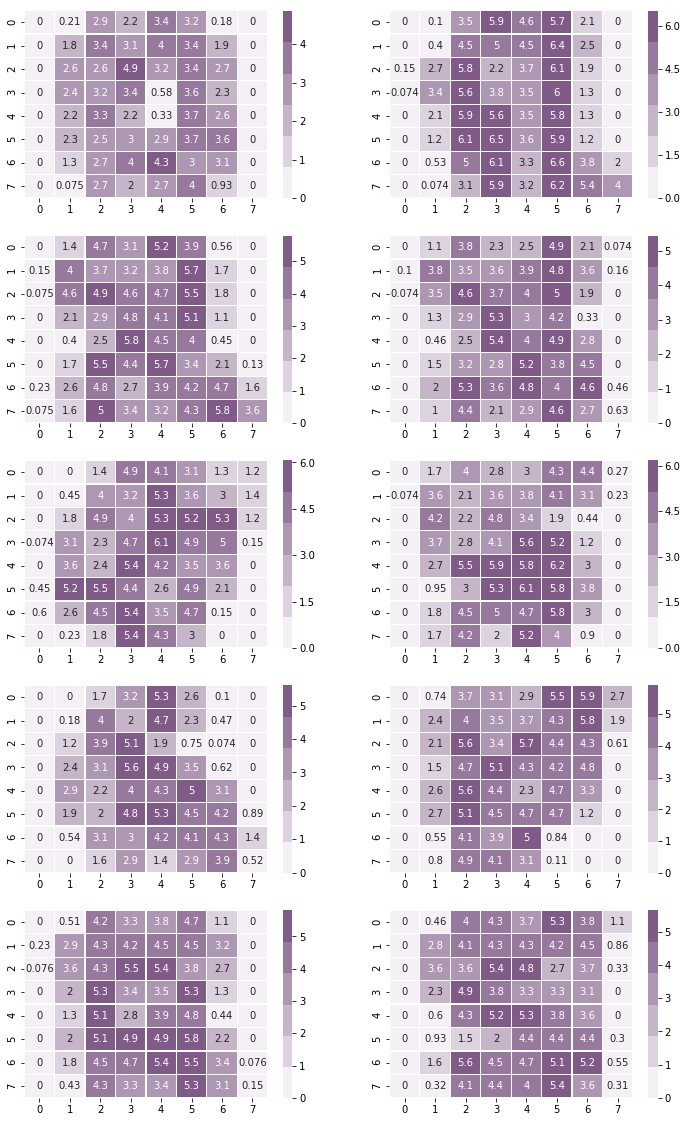

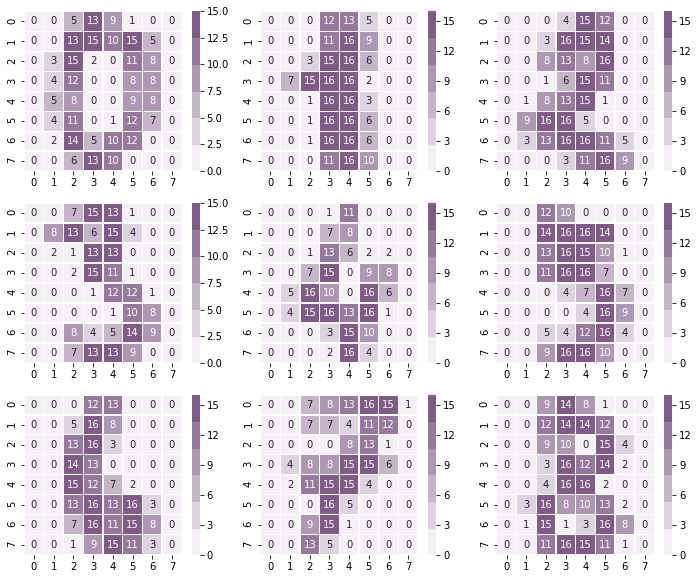

In [112]:
digits.keys()
data = pd.DataFrame(digits.data)
data.describe()
print ("The maximums for each dimension are")
max = np.array(data.max())
print (max)
print ("\n")
print ("The minimums for each dimension are")
min = np.array(data.min())
print (min)

stds = np.array(data.groupby(digits.target).std())
numbers = np.zeros([10, 8, 8])

#Reshape the 64 attributes into 8*8
for i in range(10):
    numbers[i] = stds[i].reshape((8,8))

fig, ax = plt.subplots(5, 2, figsize=(12,20))
ax = ax.flatten()

#Some value for linewidth helps identify cell boundaries in the heatmap
for a, i in zip(ax, range(10)):
    sns.heatmap(numbers[i], cmap = sns.light_palette("muted purple", input="xkcd"), ax = a, annot = True, linewidths = 0.2)

    
dgits = np.zeros([9, 8, 8])

for i in range(9):
    dgits[i] = data.loc[i].reshape((8,8))
    
fig, ax2 = plt.subplots(3, 3, figsize=(12,10))
ax2 = ax2.flatten()

for a, i in zip(ax2, range(9)):
    sns.heatmap(dgits[i], cmap = sns.light_palette("muted purple", input="xkcd"), ax = a, annot = True, linewidths = 0.2)


Not all dimensions are gonna be equally helpful for modelling. Some dimensions obviously have values of 0 which are of no use while modelling the digit. The means give a heatmap looking more similar to the actual digit as compared to the standard deviations.

### ========== Question 2.2 --- [10 marks] ==========

Create a new `PCA` object with `n_components = digits.data.shape[1]`. Plot the explained variance **ratio** against the number of components. You may find [this example](http://scikit-learn.org/stable/auto_examples/plot_digits_pipe.html#sphx-glr-auto-examples-plot-digits-pipe-py) quite handy...

Find the point where 95% of the variance has been explained. Use `plt.vlines()` to add a dotted verical line to the graph at that point and use `plt.annotate()` to label the number of eigenvectors used to explain that variance.

Below the plot, explain what you observe. What does this suggest about the data?

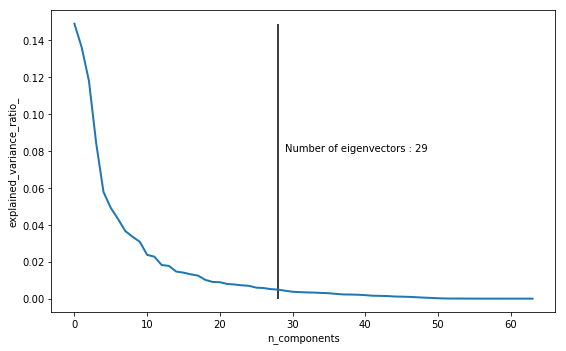

28


In [167]:
pca = PCA(n_components = digits.data.shape[1])

X_digits = digits.data
pca.fit(X_digits)
position = 0
sum = 0
total = np.sum(pca.explained_variance_ratio_)
average = 0

for i in range(64):
    sum = sum + pca.explained_variance_ratio_[i]
    average = sum/total
    if (average > 0.95):
        position = i
        break

#From the example
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)

plt.vlines(x = position, ymin = pca.explained_variance_ratio_.min(), ymax = pca.explained_variance_ratio_.max())
number = ("Number of eigenvectors : {}" .format(position + 1))
plt.annotate(number, xy = (position, 0.08), xytext=(position + 1, 0.08))
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

print (position)

We observe that we only need 29 eigenvectors to explain 95% variance in the data. This implies that other 45 principal components/dimensions are not very useful to capture the data like we observed in 2.1 where the remaining attributes have very low or 0 standard deviation. 

### ========== Question 2.3 --- [8 marks] ==========

You will find the eigenvectors stored within `pca.components_`. Reuse your code from Question 2.1 and plot the first 9 principal components (PCs). Below, plot `pca.mean_`. 

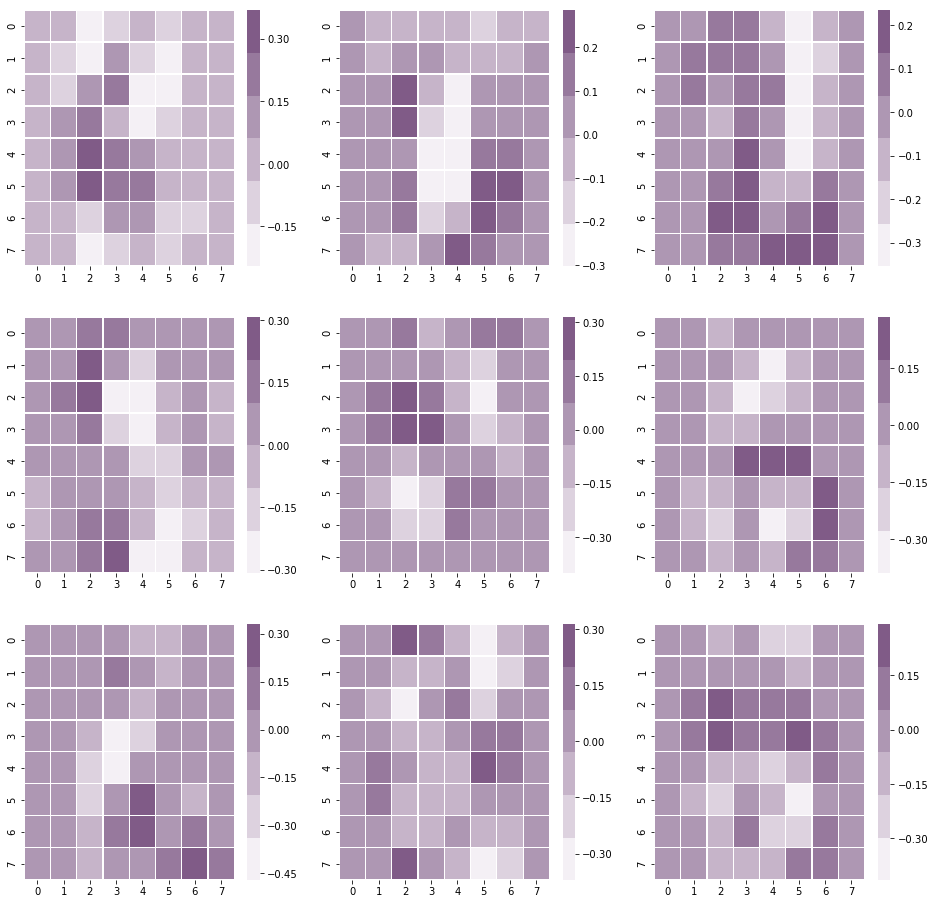

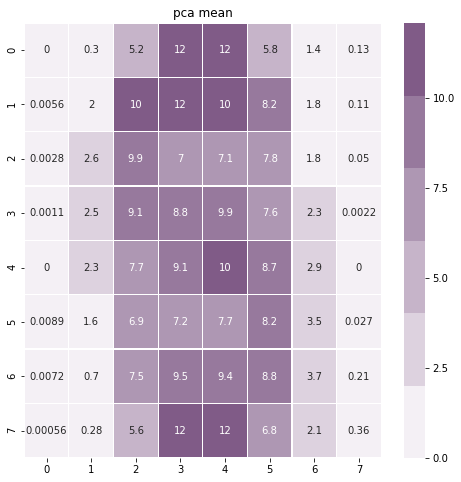

In [104]:
components = pca.components_
pcs = np.zeros([9, 8, 8])

#Reshape the 64 values into 8*8
for i in range(9):
    pcs[i] = components[i].reshape((8,8))

fig, ax = plt.subplots(3, 3, figsize=(16,16))
ax = ax.flatten()

#Kept the values out because they were coming out of the boxes
for a, i in zip(ax, range(9)):
    sns.heatmap(pcs[i], cmap = sns.light_palette("muted purple", input="xkcd"), ax = a, linewidths = 0.2)
plt.show()

fig, ax2 = plt.subplots(figsize=(8,8))
ax2.set_title("pca mean")
pc_mean = pca.mean_.reshape((8,8))

sns.heatmap(pc_mean, cmap = sns.light_palette("muted purple", input="xkcd"), ax = ax2, annot = True, linewidths = 0.2)
plt.show()

### ========== Question 2.4 --- [10 marks] ==========

Now we want to make clear how these eigenvectors and the mean are used to approximate the data. `pca.transform(digits.data[idx,:].reshape(1, -1)).flatten()` will transform the digit in row `idx` into pca space. Another way to think about this is that it will give you the coefficents to multiply each eigenvector by and to add to the mean digit such that you can reconstruct the digit.

For the digit with idx = 0 (which should itself be a zero), create 4 plots:
1. The original digit
1. The digit reconstructed using 1 principal component
1. The digit reconstructed using 2 principal components
1. The digit reconstructed using 5 principal components

In the plot titles show:
1. the number of principal components used
1. the percentage of variance explained by that number of principal components
1. the coefficients of each principal component rounded to nearest integer (tip, convert to integers to reduce print space), i.e. the PCA space vector.

Below the plots, comment on the result. Do the eigenvectors produce realistic data?

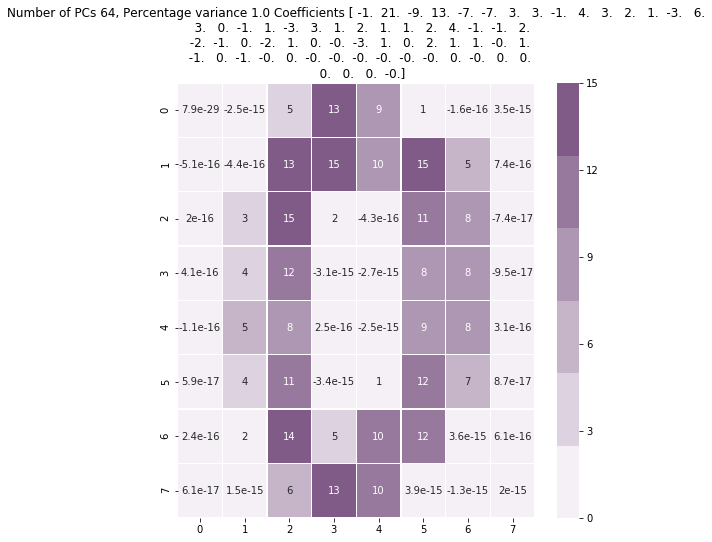

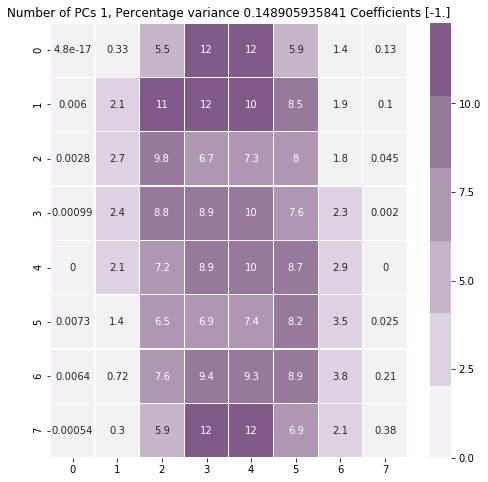

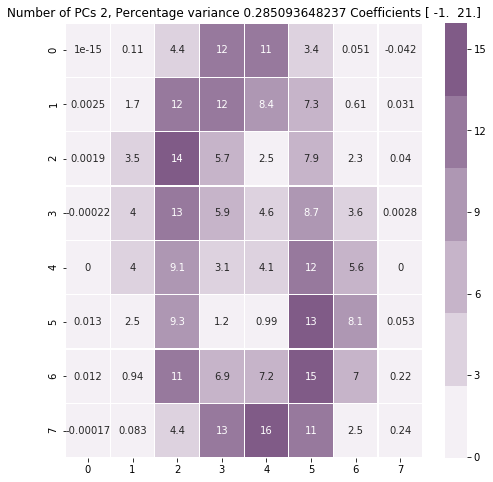

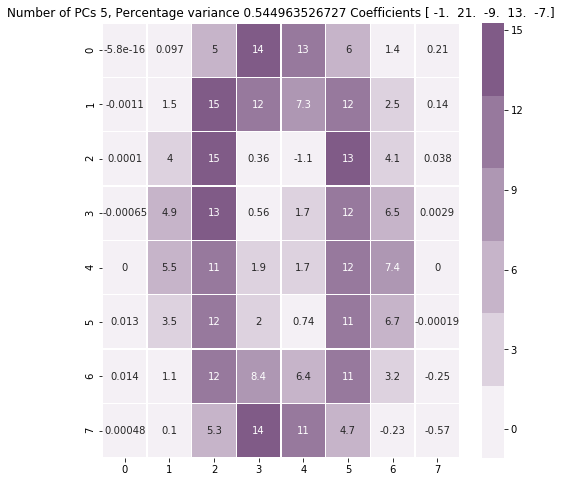

In [172]:
#original digit will have all 64 components 

n_comp = [64, 1, 2, 5]

for n in n_comp:
    pca2 = PCA (n_components=n)
    pca2.fit(X_digits) #X_digits from above

    
    idx = 0
    coeff = pca2.transform(digits.data[idx,:].reshape(1, -1)).flatten()
    eig = pca2.components_
    zero_digit = pca2.mean_
    for j in range(n):
        zero_digit += (coeff[j] * eig[j])
        
        
    pca3 = PCA(n_components = 64)
    pca3.fit(X_digits)
    sum2 = np.sum(pca3.explained_variance_ratio_)
    total2 = 0
    
    
    for i in range(n):
        total2 = total2 + pca3.explained_variance_ratio_[i]
    average2 = total2/sum2
        
        
    fig, ax2 = plt.subplots(figsize=(8,8))
    ax2.set_title("Number of PCs {}, Percentage variance {} Coefficients {}" .format(n, average2, np.round(coeff)))
    pc_plot = zero_digit.reshape((8, 8))
    sns.heatmap(pc_plot, cmap = sns.light_palette("muted purple", input="xkcd"), ax = ax2, annot = True, linewidths = 0.2)
    plt.show()
    

Our data is meant to be positive for each cell. The eigenvectors contain some negative data in this case, hence the data is not realistic.

### ========== Question 2.5 --- [14 marks] ==========

**Challenge question** 

Fit 4 models:
1. SVC with a linear kernel, no shrinking, and a random_state on digit data
1. SVC with a linear kernel, no shrinking, and the same random_state on pca transformed digit data (use the full 64 component pca above)
1. Gaussian Naive Bayes Classifier on digit data
1. Gaussian Naive Bayes Classifier on pca transformed digit data (use the full 64 component pca above)

Use 5 fold cross validation and take the mean fold score as the result. Plot or print the results.

Below the code, explain why one classifier improved when we used PCA, but the other did not!

In [186]:
pca = PCA(n_components = digits.data.shape[1])
trans_X_digits = pca.fit_transform(X_digits)
y = digits.target

svcl1 = SVC(kernel="linear", shrinking=False, random_state=1337)
svcl2 = SVC(kernel="linear", shrinking=False, random_state=1337)
gnbc1 = GaussianNB()
gnbc2 = GaussianNB()

kf = KFold(n_splits=5, shuffle=True, random_state=1337)

#1
mean_score = np.zeros([5, 1])
i = 0
for train_index, test_index in kf.split(X_digits):
    X_train, X_test = X_digits[train_index], X_digits[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svcl1.fit(X_train, y_train)
    mean_score[i] = svcl1.score(X_test, y_test)
    i += 1

print ("The classifier is SVC, on the normal digit data")
print ("The mean fold score is {}" .format(np.round(mean_score.mean(), decimals = 4)))
print ("\n")    

#2
mean_score = np.zeros([5, 1])
i = 0
for train_index, test_index in kf.split(trans_X_digits):
    X_train, X_test = trans_X_digits[train_index], trans_X_digits[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svcl2.fit(X_train, y_train)
    mean_score[i] = svcl2.score(X_test, y_test)
    i += 1

print ("The classifier is SVC, on the transformed digit data")
print ("The mean fold score is {}" .format(np.round(mean_score.mean(), decimals = 4)))
print ("\n")

#3
mean_score = np.zeros([5, 1])
i = 0
for train_index, test_index in kf.split(X_digits):
    X_train, X_test = X_digits[train_index], X_digits[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnbc1.fit(X_train, y_train)
    mean_score[i] = gnbc1.score(X_test, y_test)
    i += 1

print ("The classifier is GNB, on the normal digit data")
print ("The mean fold score is {}" .format(np.round(mean_score.mean(), decimals = 4)))
print ("\n")

#4
mean_score = np.zeros([5, 1])
i = 0
for train_index, test_index in kf.split(trans_X_digits):
    X_train, X_test = trans_X_digits[train_index], trans_X_digits[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnbc2.fit(X_train, y_train)
    mean_score[i] = gnbc2.score(X_test, y_test)
    i += 1

print ("The classifier is GNB, on the transformed digit data")
print ("The mean fold score is {}" .format(np.round(mean_score.mean(), decimals = 4)))
print ("\n")

The classifier is SVC, on the normal digit data
The mean fold score is 0.9738


The classifier is SVC, on the transformed digit data
The mean fold score is 0.9738


The classifier is GNB, on the normal digit data
The mean fold score is 0.8453


The classifier is GNB, on the transformed digit data
The mean fold score is 0.8898




SVCs are responsible for finding an appropriate hyper plane irrespective of the type of data. Since we are doing principal component analysis on the full 64 dimensions, there is no change of dimensionality and the distances remain the same.

However, this PCA process helps reduce correlation between the various dimensions in the data. Since the Naive Bayes assumption is that the attributes are independent from each other, principal component analysis increases the classification score for Gaussian Naive Bayes.